In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import platform
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100
from sklearn.manifold import TSNE

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
train_dataset = CIFAR100(root='./data', train=True, transform=transform, download=True)
test_dataset = CIFAR100(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
train_loader

In [5]:
print("Training size:", len(train_dataset))
print("Test size:", len(test_dataset))

Training size: 50000
Test size: 10000


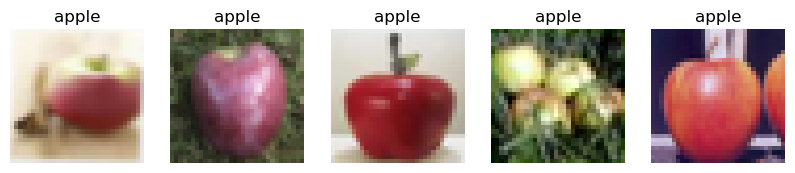

In [6]:
def visualize_class(dataset, class_name):
    class_idx = dataset.class_to_idx[class_name]
    class_images = [img for img, label in dataset if label == class_idx]

    plt.figure(figsize=(10, 5))
    for i in range(min(5, len(class_images))):
        plt.subplot(1, 5, i + 1)
        plt.imshow(np.transpose(class_images[i].numpy(), (1, 2, 0)) * 0.5 + 0.5)  # Unnormalize
        plt.title(class_name)
        plt.axis('off')
    plt.show()

visualize_class(train_dataset, 'apple')


In [7]:
print("No. of classes in train dataset:", len(train_dataset.class_to_idx))
print("No. of classes in test dataset: ", len(test_dataset.class_to_idx))

No. of classes in train dataset: 100
No. of classes in test dataset:  100


In [8]:
train_dataset.class_to_idx

{'apple': 0,
 'aquarium_fish': 1,
 'baby': 2,
 'bear': 3,
 'beaver': 4,
 'bed': 5,
 'bee': 6,
 'beetle': 7,
 'bicycle': 8,
 'bottle': 9,
 'bowl': 10,
 'boy': 11,
 'bridge': 12,
 'bus': 13,
 'butterfly': 14,
 'camel': 15,
 'can': 16,
 'castle': 17,
 'caterpillar': 18,
 'cattle': 19,
 'chair': 20,
 'chimpanzee': 21,
 'clock': 22,
 'cloud': 23,
 'cockroach': 24,
 'couch': 25,
 'crab': 26,
 'crocodile': 27,
 'cup': 28,
 'dinosaur': 29,
 'dolphin': 30,
 'elephant': 31,
 'flatfish': 32,
 'forest': 33,
 'fox': 34,
 'girl': 35,
 'hamster': 36,
 'house': 37,
 'kangaroo': 38,
 'keyboard': 39,
 'lamp': 40,
 'lawn_mower': 41,
 'leopard': 42,
 'lion': 43,
 'lizard': 44,
 'lobster': 45,
 'man': 46,
 'maple_tree': 47,
 'motorcycle': 48,
 'mountain': 49,
 'mouse': 50,
 'mushroom': 51,
 'oak_tree': 52,
 'orange': 53,
 'orchid': 54,
 'otter': 55,
 'palm_tree': 56,
 'pear': 57,
 'pickup_truck': 58,
 'pine_tree': 59,
 'plain': 60,
 'plate': 61,
 'poppy': 62,
 'porcupine': 63,
 'possum': 64,
 'rabbit': 65,

In [9]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)  # Input channels updated for RGB
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # Adjusted for CIFAR dimensions after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 100)  # Output layer for 100 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [10]:
net = LeNet5()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.003, momentum=0.8)

In [11]:
for epoch in range(3):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

[Epoch 1, Batch 100] Loss: 4.608
[Epoch 1, Batch 200] Loss: 4.607
[Epoch 1, Batch 300] Loss: 4.607
[Epoch 1, Batch 400] Loss: 4.607
[Epoch 1, Batch 500] Loss: 4.607
[Epoch 1, Batch 600] Loss: 4.606
[Epoch 1, Batch 700] Loss: 4.606
[Epoch 2, Batch 100] Loss: 4.607
[Epoch 2, Batch 200] Loss: 4.605
[Epoch 2, Batch 300] Loss: 4.605
[Epoch 2, Batch 400] Loss: 4.606
[Epoch 2, Batch 500] Loss: 4.606
[Epoch 2, Batch 600] Loss: 4.605
[Epoch 2, Batch 700] Loss: 4.605
[Epoch 3, Batch 100] Loss: 4.606
[Epoch 3, Batch 200] Loss: 4.605
[Epoch 3, Batch 300] Loss: 4.605
[Epoch 3, Batch 400] Loss: 4.603
[Epoch 3, Batch 500] Loss: 4.603
[Epoch 3, Batch 600] Loss: 4.602
[Epoch 3, Batch 700] Loss: 4.601
Finished Training


In [12]:
# Testing the model
correct = 0
total = 0
net.eval()  # Set model to evaluation mode
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the CIFAR-100 test images: {100 * correct / total:.2f}%')


Accuracy on the CIFAR-100 test images: 1.25%


In [13]:
# Define ResNet18 from scratch layer by layer
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=50):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x


In [14]:
net = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=100)
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [15]:
# Training loop
for epoch in range(3):  # Number of epochs
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training")

[Epoch 1, Batch 100] Loss: 4.316
[Epoch 1, Batch 200] Loss: 3.820
[Epoch 1, Batch 300] Loss: 3.606
[Epoch 1, Batch 400] Loss: 3.458
[Epoch 1, Batch 500] Loss: 3.330
[Epoch 1, Batch 600] Loss: 3.284
[Epoch 1, Batch 700] Loss: 3.180
[Epoch 2, Batch 100] Loss: 2.901
[Epoch 2, Batch 200] Loss: 2.895
[Epoch 2, Batch 300] Loss: 2.833
[Epoch 2, Batch 400] Loss: 2.786
[Epoch 2, Batch 500] Loss: 2.766
[Epoch 2, Batch 600] Loss: 2.733
[Epoch 2, Batch 700] Loss: 2.703
[Epoch 3, Batch 100] Loss: 2.423
[Epoch 3, Batch 200] Loss: 2.360
[Epoch 3, Batch 300] Loss: 2.407
[Epoch 3, Batch 400] Loss: 2.373
[Epoch 3, Batch 500] Loss: 2.370
[Epoch 3, Batch 600] Loss: 2.365
[Epoch 3, Batch 700] Loss: 2.362
Finished Training


In [16]:
# Testing the model
correct = 0
total = 0
net.eval()  # Set model to evaluation mode
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the CIFAR-100 test images: {100 * correct / total:.2f}%')


Accuracy on the CIFAR-100 test images: 44.24%
